In [1]:
# Data Preprocessing

In [2]:
import pandas as pd             # for data cleaning and data pre-processing
import numpy as np              # linear algebra & for mathematical computation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns           # for visualization

import warnings                 # for warning removals in code output
warnings.filterwarnings('ignore')

# Scalers & Encoders
from sklearn.preprocessing import StandardScaler, LabelEncoder
#train-test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import (mean_squared_error, r2_score)
# Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import pickle           #to save and load model files as pkl file

In [3]:
# Load the dataset

In [4]:
cars_df = pd.read_csv("Car details Dataset.csv")

In [5]:
# Created Copy of orignal dataset in order to avoid anychanges made to the orignal dataset

In [6]:
cars_df = cars_df.copy()

In [7]:
cars_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [8]:
# Exploratory Information About Dataset

In [9]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
# Here is the row count and objet datatype of column

In [11]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
# Here is the mean value,std deviation,maxima,minima of numerical columns in dataset

In [13]:
cars_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [14]:
# Here is the correlation of columns in dataset

In [15]:
cars_df[["year", "selling_price", "km_driven"]].corr()

,year,selling_price,km_driven
year,1.000000,0.414092,-0.418006
selling_price,0.414092,1.000000,-0.225534
km_driven,-0.418006,-0.225534,1.000000


In [16]:
# Here is if there are null values in columns

In [17]:
cars_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [18]:
# Here are the total columns in dataset

In [19]:
cars_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [20]:
# Here are the unique values in column name "name"

In [21]:
cars_df["name"].unique(),cars_df["name"].nunique()

(array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
        'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
        'Ford Freestyle Titanium Plus Diesel BSIV',
        'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object),
 2058)

In [22]:
# Here are the lambda and split function

In [23]:
cars_df["brand"] = cars_df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
cars_df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

In [24]:
# Here is the value count of all cars

In [25]:
cars_df.brand.value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [26]:
# Data Cleaning

In [27]:
cars_df["mileage_kmpl"] = [item.split(" ")[0] for item in cars_df["mileage"].astype(str)]
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,mileage_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1


In [28]:
cars_df["engine_cc"] = [item.split(" ")[0] for item in cars_df["engine"].astype(str)]
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,mileage_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,1298


In [29]:
cars_df["max_power_bhp"] = [item.split(" ")[0] for item in cars_df["max_power"].astype(str)]
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,mileage_kmpl,engine_cc,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,1298,88.2


In [30]:
cars_df["max_power_bhp"].dtype

dtype('O')

In [31]:
cars_df.drop(["mileage", "engine", "max_power"], axis=1, inplace=True)
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,brand,mileage_kmpl,engine_cc,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,Maruti,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,1298,88.2


In [32]:
cars_df = cars_df.loc[: , ["name", "brand", "year", "selling_price", "km_driven", "fuel", "seller_type", "transmission", "owner", "mileage_kmpl",
                           "engine_cc", "max_power_bhp", "torque", "seats"] ]

In [33]:
cars_df.head()

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,torque,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [34]:
empty_finder = [item for item in cars_df["max_power_bhp"] == '']
empty_finder

i=0
result = []
while i < len(empty_finder):
    if empty_finder[i] == True:
        result.append(i)
    i+=1

print(result)

[4933]


In [35]:
cars_df["max_power_bhp"][4933]


''

In [36]:
cars_df["max_power_bhp"][4933] = '0'


In [37]:
cars_df = cars_df.astype({"mileage_kmpl" : float, "engine_cc" : float, "max_power_bhp" : float})


In [38]:
cars_df["mileage_kmpl"].dtype

dtype('float64')

In [39]:
cars_df["engine_cc"].dtype

dtype('float64')

In [40]:
cars_df["max_power_bhp"].dtype

dtype('float64')

In [41]:
cars_df

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,torque,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [42]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   brand          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   int64  
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage_kmpl   7907 non-null   float64
 10  engine_cc      7907 non-null   float64
 11  max_power_bhp  7913 non-null   float64
 12  torque         7906 non-null   object 
 13  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 889.1+ KB


In [43]:
cars_df.describe()

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7913.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.506353,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.835006,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [44]:
cars_df[["year", "selling_price", "km_driven", "mileage_kmpl", "engine_cc", "max_power_bhp", "seats"]].corr()

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.227207,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748383,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038234,0.227336
mileage_kmpl,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.373676,-0.452085
engine_cc,0.018848,0.455734,0.205914,-0.575831,1.000000,0.704031,0.610309
max_power_bhp,0.227207,0.748383,-0.038234,-0.373676,0.704031,1.000000,0.190959
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.190959,1.000000


In [45]:
cars_df.isnull().sum()

name               0
brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage_kmpl     221
engine_cc        221
max_power_bhp    215
torque           222
seats            221
dtype: int64

In [46]:
cars_df["mileage_kmpl"].isnull().value_counts()

mileage_kmpl
False    7907
True      221
Name: count, dtype: int64

In [47]:
cars_df["mileage_kmpl"].fillna(0, inplace = True)

In [48]:
cars_df["mileage_kmpl"].isnull().value_counts()

mileage_kmpl
False    8128
Name: count, dtype: int64

In [49]:
cars_df["engine_cc"].isnull().value_counts()

engine_cc
False    7907
True      221
Name: count, dtype: int64

In [50]:
cars_df["engine_cc"].fillna(0, inplace = True)

In [51]:
cars_df["engine_cc"].isnull().value_counts()

engine_cc
False    8128
Name: count, dtype: int64

In [52]:
cars_df["max_power_bhp"].isnull().value_counts()

max_power_bhp
False    7913
True      215
Name: count, dtype: int64

In [53]:
cars_df["max_power_bhp"].fillna(0, inplace = True)

In [54]:
cars_df["max_power_bhp"].isnull().value_counts()

max_power_bhp
False    8128
Name: count, dtype: int64

In [55]:
cars_df["torque"].isnull().value_counts()

torque
False    7906
True      222
Name: count, dtype: int64

In [56]:
cars_df["torque"].fillna(0, inplace = True)

In [57]:
cars_df["torque"].isnull().value_counts()

torque
False    8128
Name: count, dtype: int64

In [58]:
cars_df["seats"].isnull().value_counts()

seats
False    7907
True      221
Name: count, dtype: int64

In [59]:
cars_df["seats"].fillna(0, inplace = True)

In [60]:
cars_df["seats"].isnull().value_counts()

seats
False    8128
Name: count, dtype: int64

In [61]:
cars_df.isnull().sum()

name             0
brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage_kmpl     0
engine_cc        0
max_power_bhp    0
torque           0
seats            0
dtype: int64

In [62]:
cars_df["torque"].unique(),cars_df["torque"].nunique()

(array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
        '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
        '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
        '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
        '78Nm@ 4500rpm', 0, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
        '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
        '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
        '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
        '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
        '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
        '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
        '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
        '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
        '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
        '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
        '200N

In [63]:
cars_df.drop(["torque"], axis = 1, inplace = True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   brand          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   int64  
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage_kmpl   8128 non-null   float64
 10  engine_cc      8128 non-null   float64
 11  max_power_bhp  8128 non-null   float64
 12  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [64]:
# Data visualization

In [65]:
# Countplot of all cars

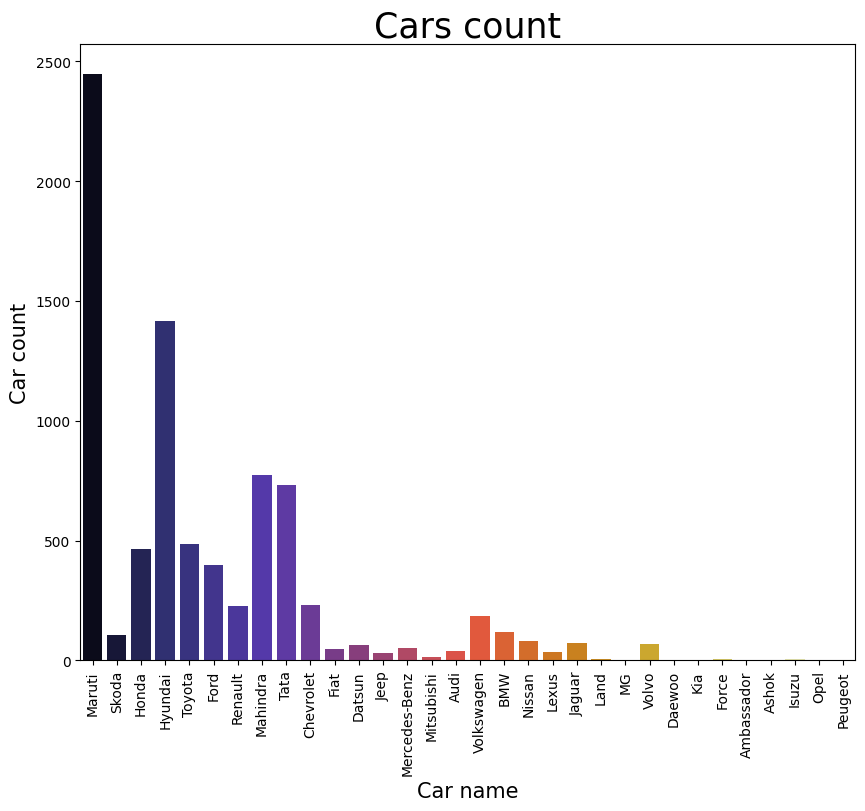

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(data=cars_df,x="brand",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Car name",fontsize=15,color="black")
plt.ylabel("Car count",fontsize=15,color="black")
plt.title("Cars count",fontsize=25)
plt.show()

In [67]:
cars_df.year.value_counts()

year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64

In [68]:
# Countplot of all years

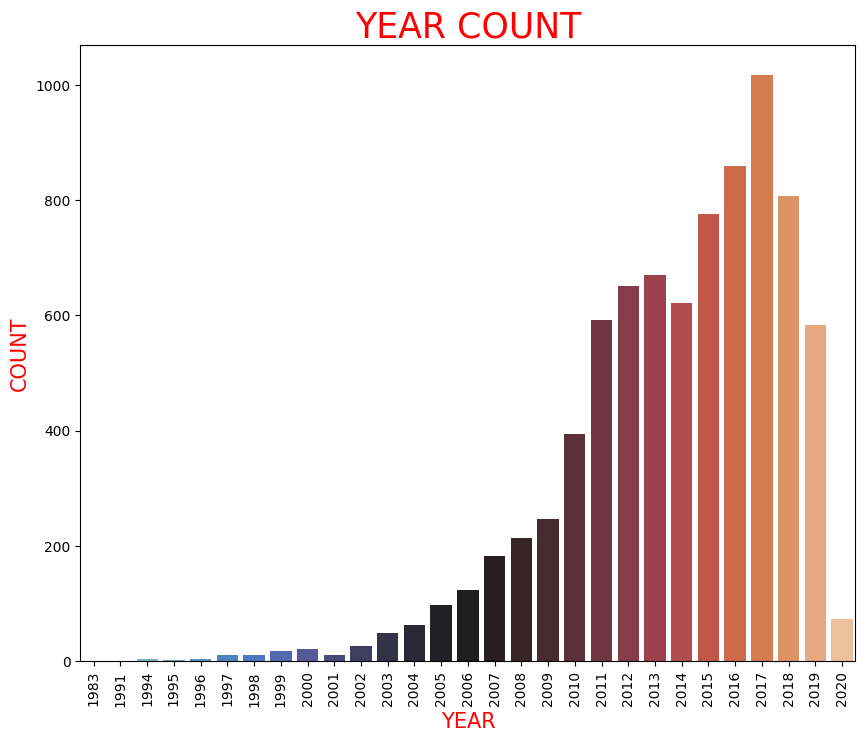

In [69]:
plt.figure(figsize=(10,8))
sns.countplot(data=cars_df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=15,color="RED")
plt.ylabel("COUNT",fontsize=15,color="RED")
plt.title("YEAR COUNT",fontsize=25,color="RED")
plt.show()

In [70]:
# Pie Chart of top 5 cars

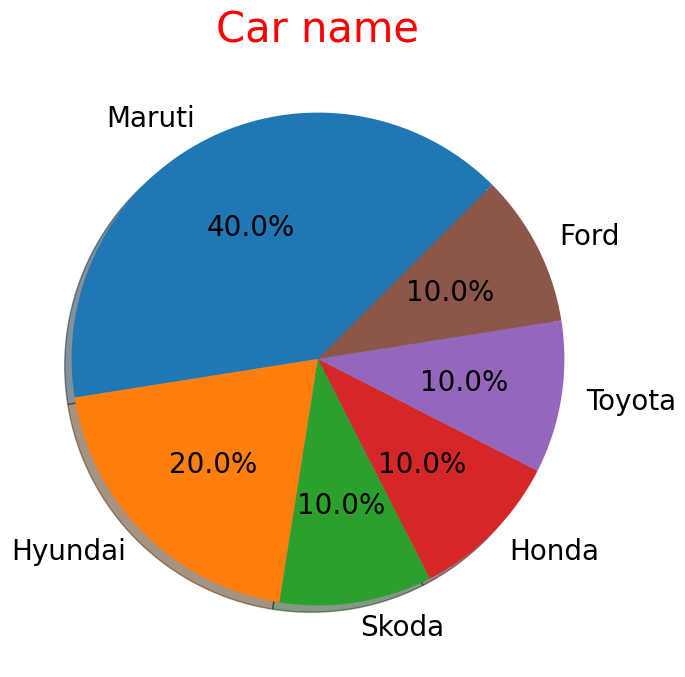

In [71]:
labels = cars_df["brand"][:10].value_counts().index
sizes = cars_df["brand"][:10].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Car name',color = 'red',fontsize = 30)
plt.show()

In [72]:
# Piechart of car sell of particular Year

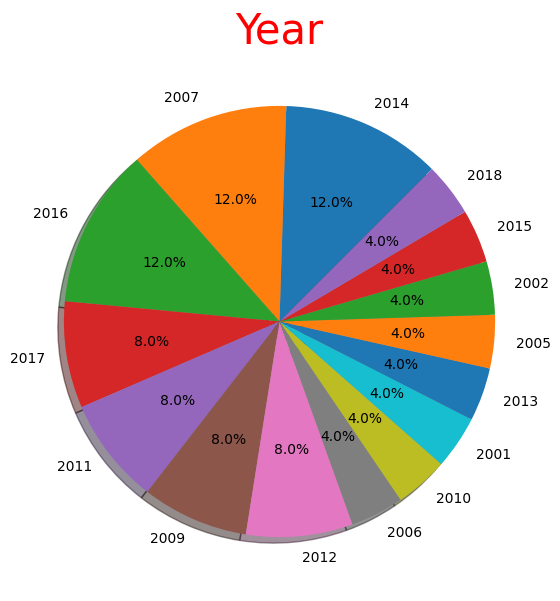

In [73]:
labels = cars_df["year"][:25].value_counts().index
sizes = cars_df["year"][:25].value_counts()
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, 
        startangle=45,textprops={'fontsize':10})
plt.title('Year',color = 'red',fontsize = 30)
plt.show()

In [74]:
# Heatmap of correlation between years,selling_price,km_driven

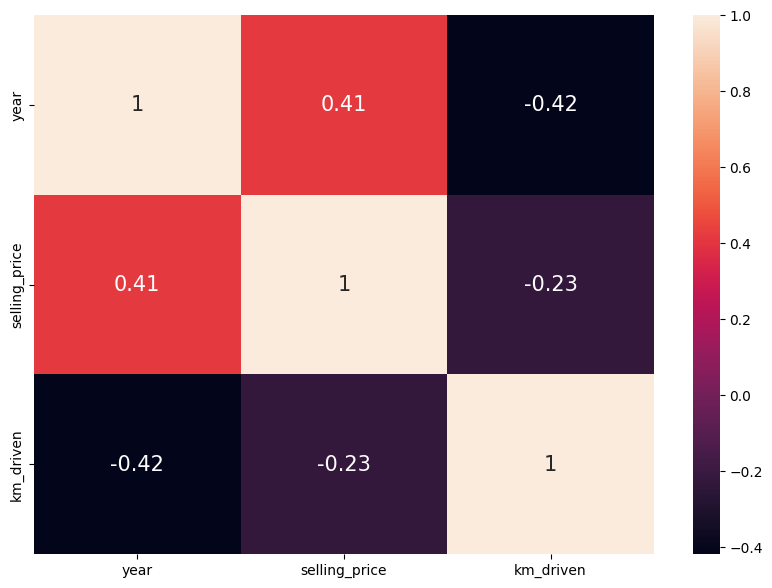

In [75]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(cars_df[["year", "selling_price", "km_driven"]].corr(), annot=True,annot_kws={'fontsize':15})

In [76]:
cars_df.seller_type.value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [77]:
# Countplot of sellercount

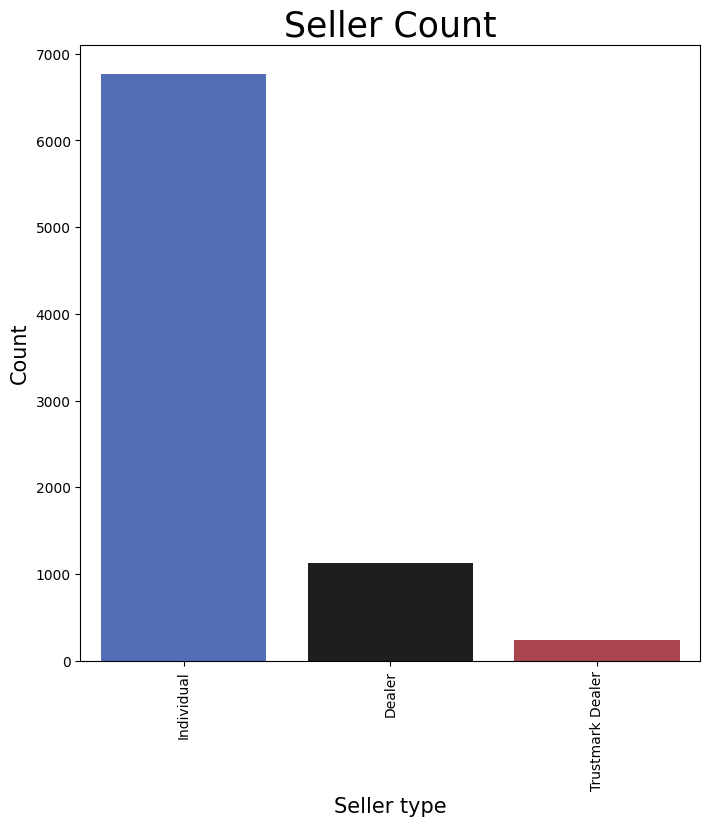

In [78]:
plt.figure(figsize=(8,8))
sns.countplot(data=cars_df,x="seller_type",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Seller type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Seller Count",fontsize=25,color="black")
plt.show()

In [79]:
cars_df.owner.value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [80]:
# Countplot of ownercount

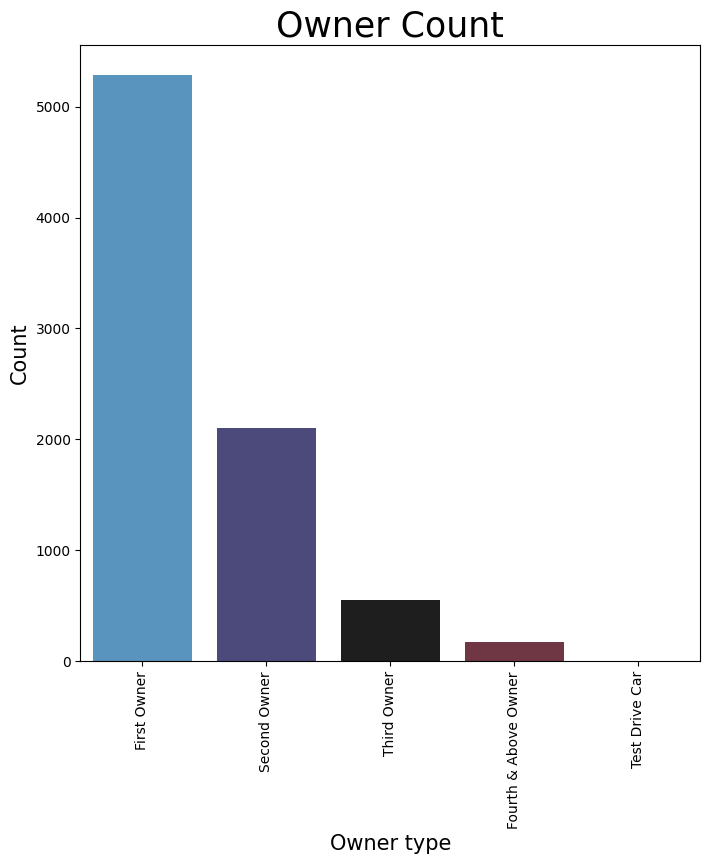

In [81]:
plt.figure(figsize=(8,8))
sns.countplot(data=cars_df,x="owner",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Owner type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Owner Count",fontsize=25,color="black")
plt.show()

In [82]:
# Histplot of year

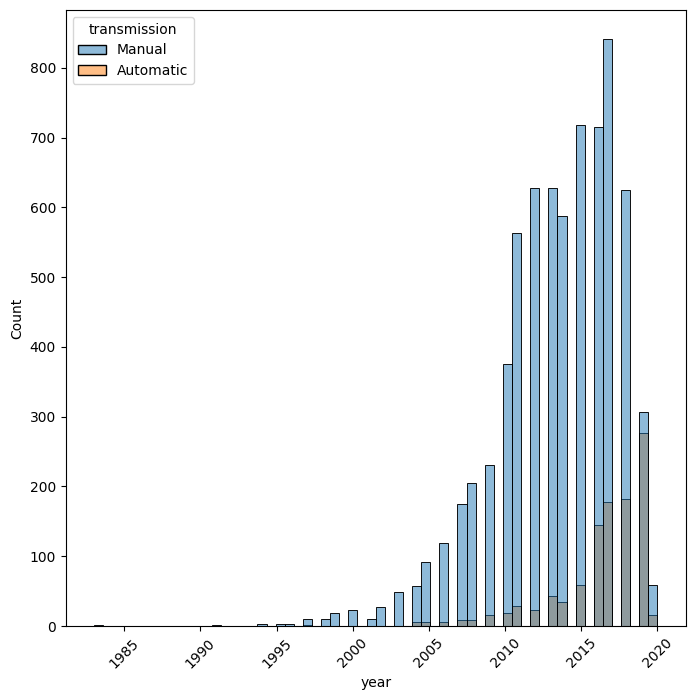

In [83]:
plt.figure(figsize=(8,8))
sns.histplot(data=cars_df, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

In [84]:
# Histplot of owner

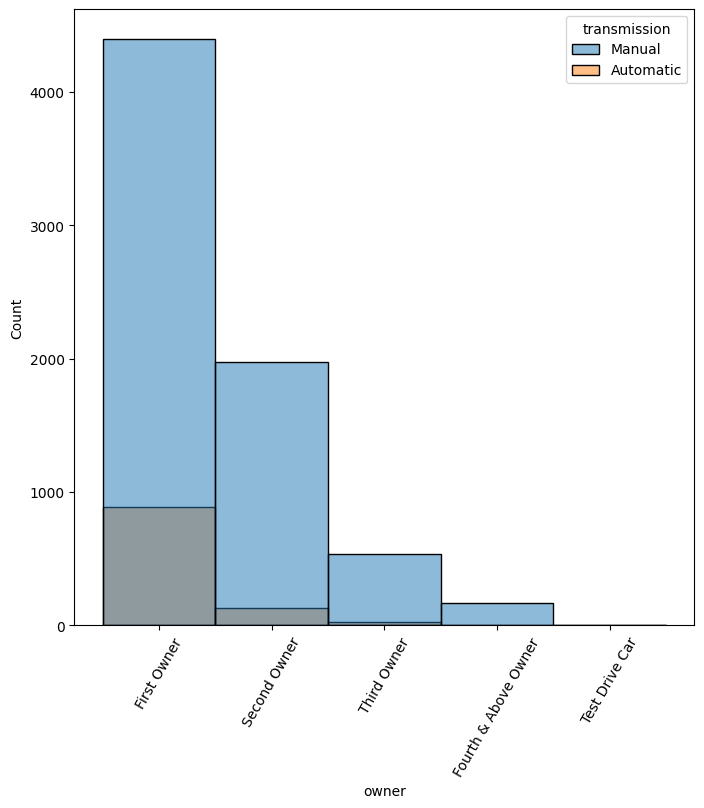

In [85]:
plt.figure(figsize=(8,8))
sns.histplot(data=cars_df, x="owner", hue="transmission")
plt.xticks(rotation=60)
plt.show()

In [86]:
# Histplot of seller_type

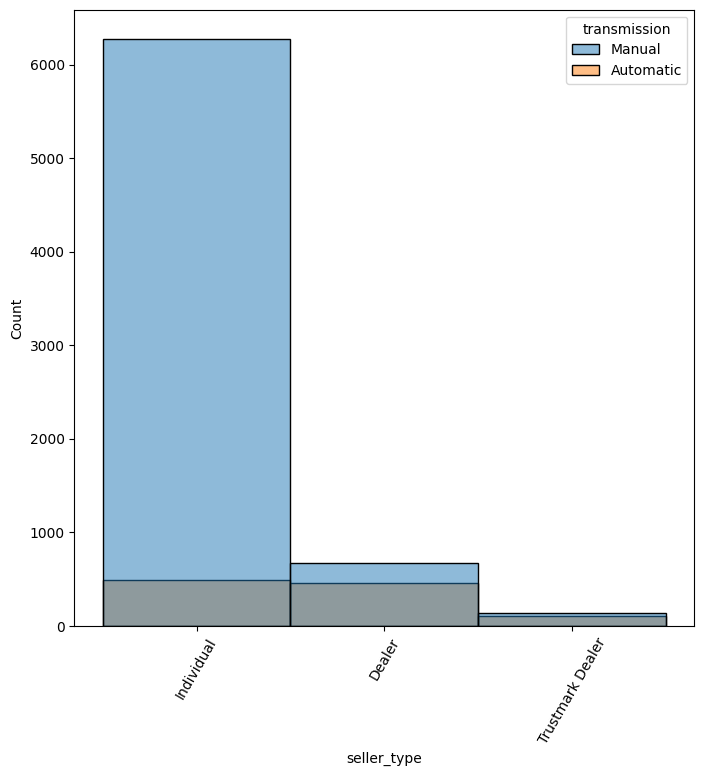

In [87]:
plt.figure(figsize=(8,8))
sns.histplot(data=cars_df, x="seller_type", hue="transmission")
plt.xticks(rotation=60)
plt.show()

In [88]:
# Boxplot of all cars to find outliers

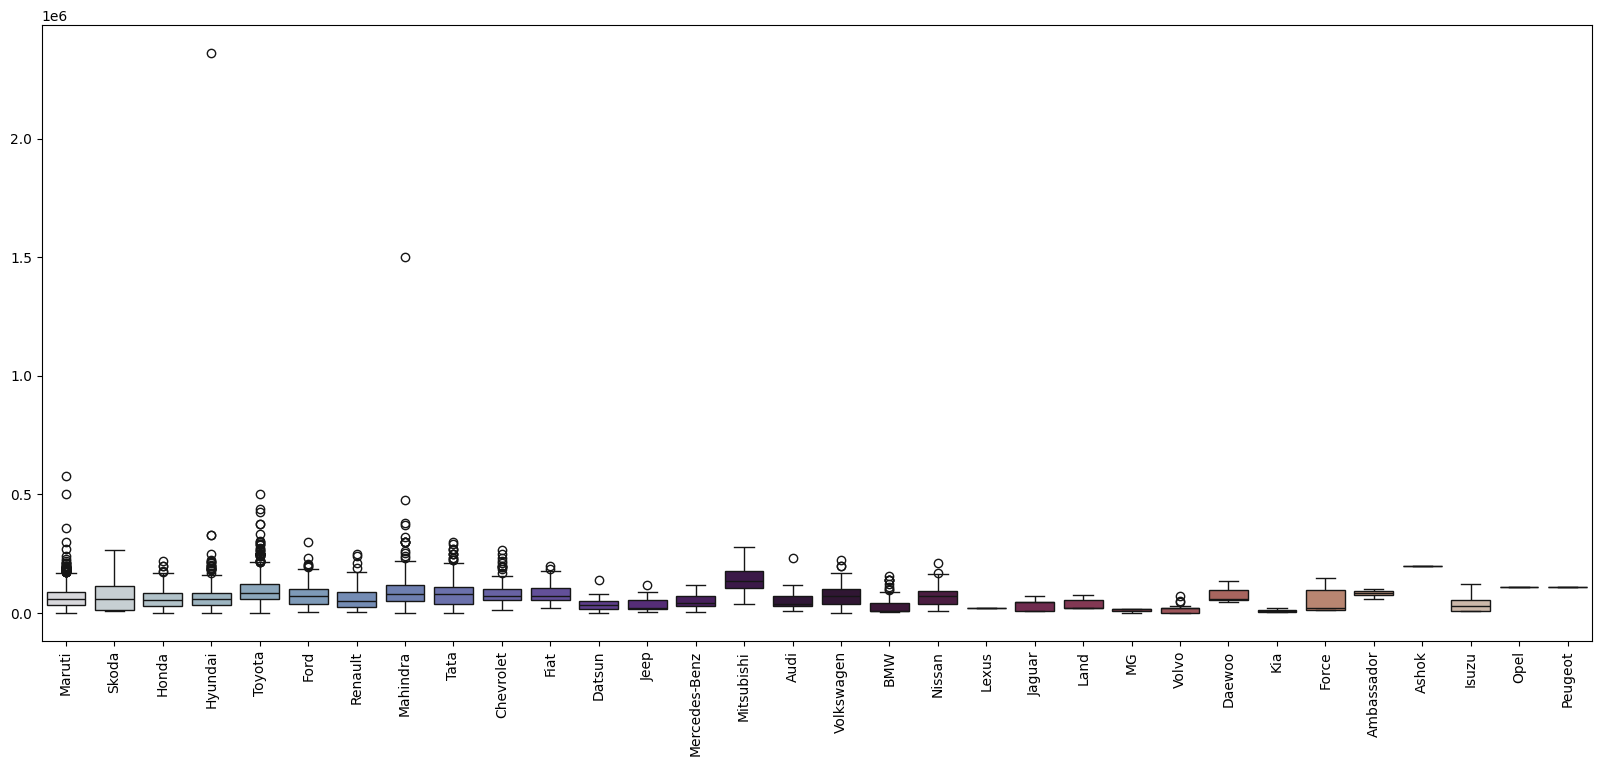

In [89]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=cars_df["brand"].values, y = cars_df["km_driven"].values,palette="twilight" , ax=ax)
plt.xticks(rotation=90)
plt.show()

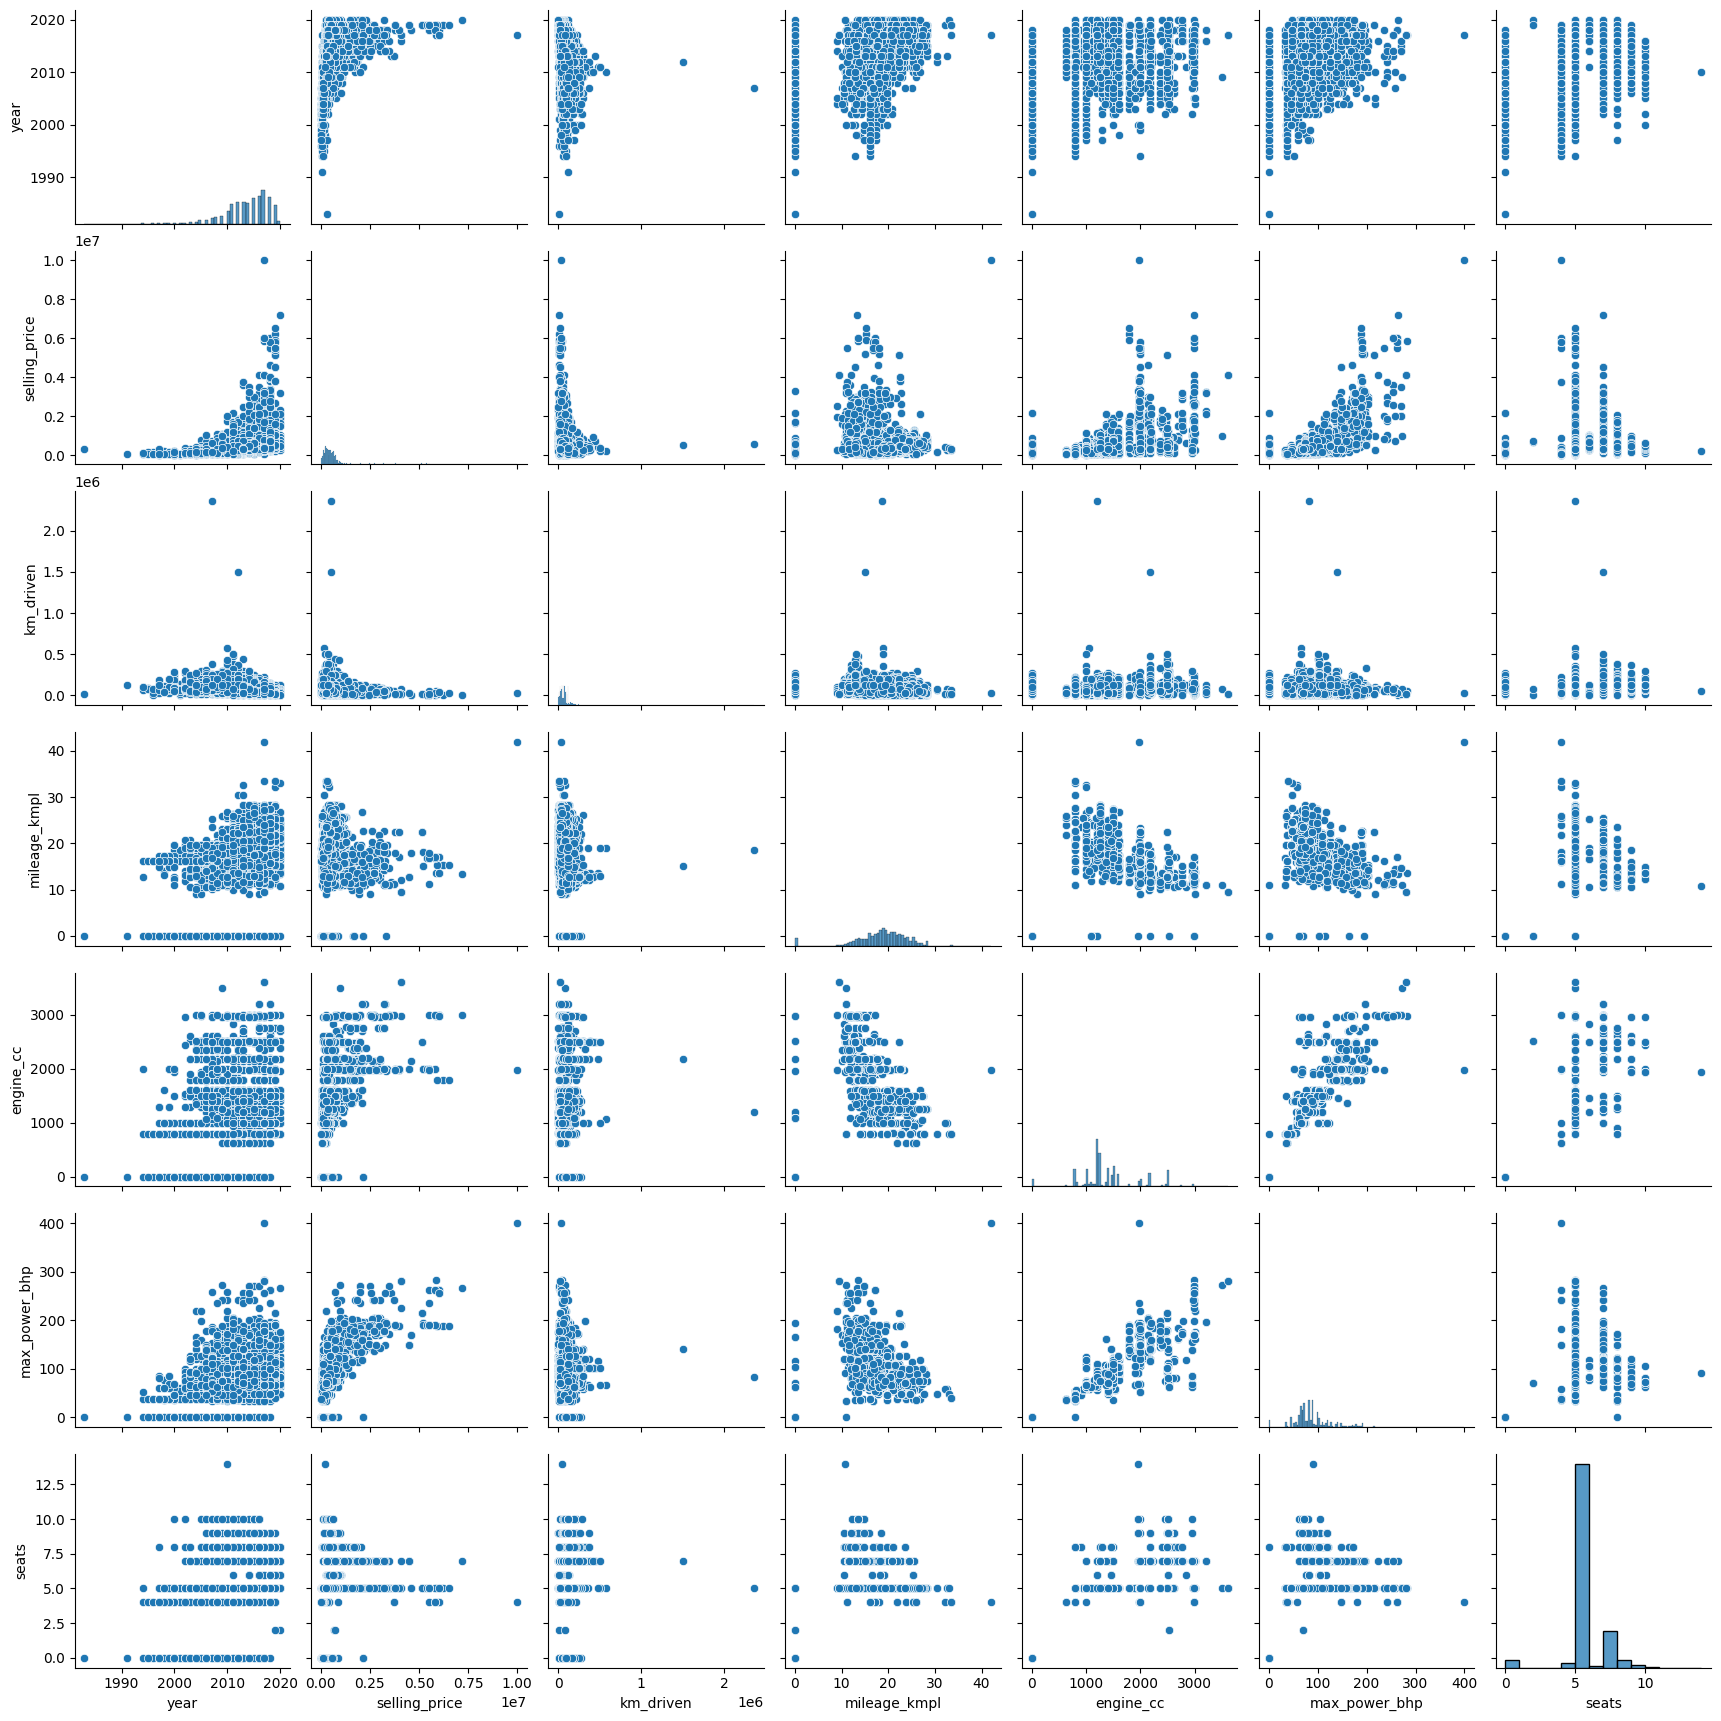

In [90]:
# Visualize distributions
sns.pairplot(cars_df)
plt.show()

In [91]:
category_col = cars_df.select_dtypes(include="object").columns
print(f"Categorical Columns in {cars_df} :\n", category_col)

numerical_col = cars_df.select_dtypes(include="number").columns
print(f"\nNumerical Columns in {cars_df} :\n", numerical_col)

Categorical Columns in                               name    brand  year  selling_price  km_driven  \
0           Maruti Swift Dzire VDI   Maruti  2014         450000     145500   
1     Skoda Rapid 1.5 TDI Ambition    Skoda  2014         370000     120000   
2         Honda City 2017-2020 EXi    Honda  2006         158000     140000   
3        Hyundai i20 Sportz Diesel  Hyundai  2010         225000     127000   
4           Maruti Swift VXI BSIII   Maruti  2007         130000     120000   
...                            ...      ...   ...            ...        ...   
8123             Hyundai i20 Magna  Hyundai  2013         320000     110000   
8124         Hyundai Verna CRDi SX  Hyundai  2007         135000     119000   
8125        Maruti Swift Dzire ZDi   Maruti  2009         382000     120000   
8126               Tata Indigo CR4     Tata  2013         290000      25000   
8127               Tata Indigo CR4     Tata  2013         290000      25000   

        fuel seller_type tra

In [92]:
# One hot encoder
#df_one =  cars_df.astype({"mileage_kmpl" : str, "engine_cc" : str, "max_power_bhp" : str,"seats" : str, "year" : str, "selling_price" : str})

df_one = pd.get_dummies(cars_df, dtype = float, drop_first = True)

In [93]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   brand          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   int64  
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage_kmpl   8128 non-null   float64
 10  engine_cc      8128 non-null   float64
 11  max_power_bhp  8128 non-null   float64
 12  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [94]:
# Using Label Encoder to encode categorical data
label_encoder = LabelEncoder()  # instance of encoder
# Loop to  encode data in df
for feature in category_col:
    df_one[feature] = label_encoder.fit_transform(cars_df[feature])
df_one.head()

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,name,brand,fuel,seller_type,transmission,owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1307,20,1,1,1,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1607,27,1,1,1,2
2,2006,158000,140000,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,385,10,3,1,1,4
3,2010,225000,127000,23.00,1396.0,90.00,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,781,11,1,1,1,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1349,20,3,1,1,0


In [95]:
# Split the data into training and testing sets
X = df_one.drop('selling_price', axis=1)
y = df_one['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Evaluate the model
y_pred = model.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean squared error: 2.383463172527112e+36
R2 score: -3.636185736240598e+24


In [99]:
# Creating a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [100]:
# Fit the model to the training data
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
# Evaluate the model on the test data
y_pred_rf = model_rf.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_rf))
print('R2 score:', r2_score(y_test, y_pred_rf))

Mean squared error: 18440526862.456093
R2 score: 0.9718673308994618


In [102]:
# Creating a Gradient Boosting Regressor model
model_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [103]:
# Fit the model to the training data
model_gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [104]:
# Evaluate the model on the test data
y_pred_gbr = model_gbr.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_gbr))
print('R2 score:', r2_score(y_test, y_pred_gbr))

Mean squared error: 24441224692.853336
R2 score: 0.9627127309417683


In [105]:
# Creating a AdaBoost Regressor model
model_ada = AdaBoostRegressor(n_estimators=100, random_state=42)

In [106]:
# Fit the model to the training data
model_ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [107]:
# Evaluate the model on the test data
y_pred_ada = model_ada.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_ada))
print('R2 score:', r2_score(y_test, y_pred_ada))

Mean squared error: 241784616638.54892
R2 score: 0.6311359938776263


In [108]:
# Creating a Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)

In [109]:
# Fit the model to the training data
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [110]:
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters
km = KMeans(n_clusters=3)
# Fit the KMeans model to the data
km.fit(X)
# Print the cluster centers
print(km.cluster_centers_)

[[2.01142153e+03 1.23926982e+05 1.74736477e+01 ... 9.58121331e-01
  9.54990215e-01 1.33698630e+00]
 [2.01489822e+03 4.43365800e+04 1.95414558e+01 ... 8.59450727e-01
  8.32166577e-01 5.74582660e-01]
 [2.00950000e+03 1.93022850e+06 1.68500000e+01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [111]:
# Evaluate the model on the test data
y_pred_dt = model_dt.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_dt))
print('R2 score:', r2_score(y_test, y_pred_dt))

Mean squared error: 49151608090.72904
R2 score: 0.9250148362631083


In [112]:
# Creating a KNeighborsRegressor model
model_knn = KNeighborsRegressor(n_neighbors=5)

In [113]:
# Fit the model to the training data
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [114]:
# Evaluate the model on the test data
y_pred_knn = model_knn.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_knn))
print('R2 score:', r2_score(y_test, y_pred_knn))

Mean squared error: 134410032727.4544
R2 score: 0.794945502223554


In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
# Creating a Logistic Regression model
model_lr = LogisticRegression()

In [117]:
# Fit the model to the training data
model_lr.fit(X_train, y_train)

LogisticRegression()

In [118]:
# Evaluate the model on the test data
y_pred_lr = model_lr.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_lr))
print('R2 score:', r2_score(y_test, y_pred_lr))

Mean squared error: 93691593309.94588
R2 score: 0.8570651146927235


In [119]:
from sklearn.decomposition import PCA

In [120]:
# Create a PCA instance with 2 components
pca = PCA(n_components=2)

In [121]:
# Fit the PCA instance to the scaled data
X_reduced = pca.fit_transform(X_train)

In [122]:
# Print the shape of the reduced data
print(X_reduced.shape)

(6502, 2)


In [123]:
# Applying the PCA model to the test data
X_test_reduced = pca.transform(X_test)

In [124]:
# Train a new model on the reduced data
model = LinearRegression()
model.fit(X_reduced, y_train)

LinearRegression()

In [125]:
# Evaluate the model on the reduced test data
y_pred_reduced = model.predict(X_test_reduced)
print('Mean squared error:', mean_squared_error(y_test, y_pred_reduced))
print('R2 score:', r2_score(y_test, y_pred_reduced))

Mean squared error: 229865311462.24496
R2 score: 0.6493199574343287


In [126]:
# Applying Remaining Essemble Technique
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [127]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

In [128]:
# Create a bagging classifier with 100 decision trees
bag_clf = BaggingClassifier(
    base_estimator=dt_clf,
    n_estimators=100,
    random_state=42,
)

In [129]:
# Fit the bagging classifier to the training data
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [130]:
# Applying the bagging classifier to the test data
y_pred_bag = bag_clf.predict(X_test)

In [131]:
# Evaluate the bagging classifier
print('Mean squared error:', mean_squared_error(y_test, y_pred_bag))
print('R2 score:', r2_score(y_test, y_pred_bag))

Mean squared error: 18568661029.89422
R2 score: 0.9716718507941536


In [132]:
# Applying the Random forest classifier and voting clasifier 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [133]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [134]:
# Create a logistic regression classifier
lr_clf = LogisticRegression(random_state=42)

In [135]:
# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('lr', lr_clf)],
    voting='hard'
)

In [136]:
# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [137]:
# Apply the voting classifier to the test data
y_pred_voting = voting_clf.predict(X_test)

In [138]:
# Evaluate the voting classifier
print('Mean squared error:', mean_squared_error(y_test, y_pred_voting))
print('R2 score:', r2_score(y_test, y_pred_voting))

Mean squared error: 56931902498.53506
R2 score: 0.9131453029405434


In [139]:
# Applying Naive Bayes classification algorithm
from sklearn.naive_bayes import GaussianNB

In [140]:
# Creating a Naive Bayes model
model_nb = GaussianNB()

In [141]:
# Fitting the model to the training data
model_nb.fit(X_train, y_train)

GaussianNB()

In [142]:
# Evaluating the model on the test data
y_pred_nb = model_nb.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred_nb))
print('R2 score:', r2_score(y_test, y_pred_nb))

Mean squared error: 61439728479.80566
R2 score: 0.9062682121914668


In [143]:
# Save the model
filename = 'car_price_prediction_model.pkl'
pickle.dump(model, open(filename, 'wb'))
